In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('iris-data.csv', index_col = 0)

In [3]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [4]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [5]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

In [6]:
y.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: lar.petalo, dtype: float64

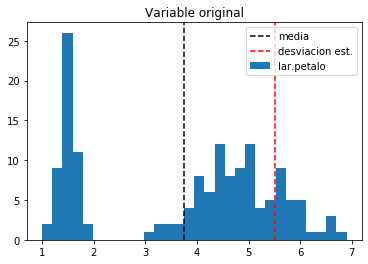

In [7]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins = 30, label = 'lar.petalo')
ax.axvline(x = np.mean(y), c = 'k', label= 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label= 'desviacion est.', linestyle = '--')
ax.legend();

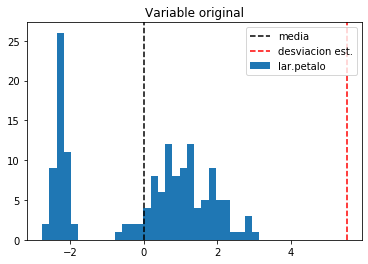

In [8]:
fig, ax = plt.subplots()   #Estandarización
ax.set_title('Variable original')
ax.hist(y -  np.mean(y), bins = 30, label = 'lar.petalo')
ax.axvline(x = np.mean(y -  np.mean(y)), c = 'k', label= 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label= 'desviacion est.', linestyle = '--')
ax.legend();

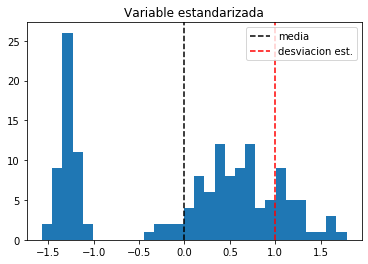

In [9]:
#Primer ppa
fig, ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist((y -  np.mean(y))/np.std(y), bins = 30)
ax.axvline(x = np.mean((np.mean(y -  np.mean(y))/np.std(y))), c = 'k', label= 'media', linestyle = '--')
ax.axvline(x = np.mean((np.mean(y -  np.mean(y))/np.std(y))) + np.std((y -  np.mean(y))/np.std(y)), c = 'r', label= 'desviacion est.', linestyle = '--')
ax.legend();

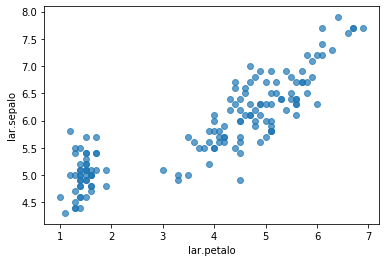

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.sepalo')
ax.autoscale();

In [18]:
np.cov(df['lar.petalo'], df['lar.sepalo'])   #Covarianza Ver la relacion no estandarizada 

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

Relacion puntual entre las dos variables esquina inf izq con esq sup derecha (1.2743) 
y las varianzas de cada variable son (petalo - 3.1162) y (sepalo - 0.68)

In [22]:
corr = df.corr(method = 'kendall')  #kendall o spearman  #Medir la fuerza de la correlacion
corr 

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


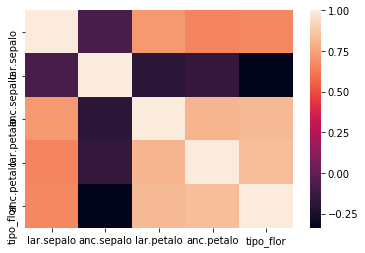

In [20]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns ).autoscale()